<a href="https://colab.research.google.com/github/RybakovAlex/Python-for-Analythics/blob/main/%D0%91%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82_%22GB_Homework_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality

In [195]:
# Импортирую нужные библиотеки
import pandas as pd
import requests, zipfile, io #работает с архивами
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами
import numpy as np

In [196]:
# Указываю ссылку на архив с датасетом и проверяю доступность
r = requests.get('https://archive.ics.uci.edu/dataset/186/wine+quality')
print(r.status_code)

200


По вышеуказанной в ДЗ ссылке на архив с датасетом переход невозможен!\
Файл доступен для скачивания c ресурса при нажатии на кнопку "Download".\
Далее выполняю ДЗ, используя выгруженные вручную файлы.

In [197]:
# Загружаю вручную в Colab датасет winequality-red
wine_red = pd.read_csv('/content/winequality-red.csv', sep = ';')
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [198]:
wine_red.shape

(1599, 12)

In [199]:
# Добавляю столбец "type wine" в датасет winequality-red
wine_red.insert(0, "type wine", "red")
wine_red.head()

,type wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [200]:
# Загружаем в Colab датасет winequality-white
wine_white = pd.read_csv('/content/winequality-white.csv', sep = ';')
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [201]:
wine_white.shape

(4898, 12)

In [202]:
# Добавляю столбец "type wine" в датасет winequality-white
wine_white.insert(0, "type wine", "white")
wine_white.head()

,type wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [203]:
# Объединяю две таблицы в одну с помощью метода concat
wine_red = pd.DataFrame(wine_red)
wine_white = pd.DataFrame(wine_white)
wine_quality = pd.concat([wine_red, wine_white], ignore_index=True)
print(wine_quality)

     type wine  fixed acidity  volatile acidity  citric acid  residual sugar  \
0          red            7.4              0.70         0.00             1.9   
1          red            7.8              0.88         0.00             2.6   
2          red            7.8              0.76         0.04             2.3   
3          red           11.2              0.28         0.56             1.9   
4          red            7.4              0.70         0.00             1.9   
...        ...            ...               ...          ...             ...   
6492     white            6.2              0.21         0.29             1.6   
6493     white            6.6              0.32         0.36             8.0   
6494     white            6.5              0.24         0.19             1.2   
6495     white            5.5              0.29         0.30             1.1   
6496     white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  t

2. На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.

In [204]:
wine_quality['good'] = [1 if x > 5 else 0 for x in wine_quality ['quality']]
wine_quality.head()

,type wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [205]:
wine_quality.shape

(6497, 14)

3. Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока.

In [206]:
# Выбираю стиль оформления диаграмм
plt.style.use('fivethirtyeight')

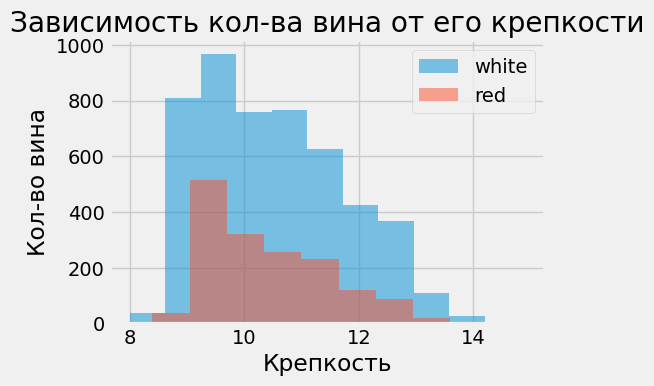

Выводы! Наиболее популярная крепкость вина 9-13 градусов.
Кол-во белого вина более чем в два раза превышает объемы красного вина.


In [207]:
# Строим гистограмму в разрезе красного и белого вина, его количества и крепкости
plt.figure(figsize = (5,3.5))
plt.hist(wine_quality['alcohol'].loc[wine_quality['type wine'] == 'white'], alpha = 0.5, label = 'white')
plt.hist(wine_quality['alcohol'].loc[wine_quality['type wine'] == 'red'], alpha = 0.5, label = 'red')
plt.title('Зависимость кол-ва вина от его крепкости')
plt.xlabel('Крепкость')
plt.ylabel('Кол-во вина')
plt.legend()
plt.show()
print('\033[93m' + 'Выводы! Наиболее популярная крепкость вина 9-13 градусов.\nКол-во белого вина более чем в два раза превышает объемы красного вина.')

In [208]:
# Готовлю данные для графика зависимости качества вина и его крепкости в виде сводной таблицы
data = wine_quality.groupby('quality')['alcohol'].agg(mean = 'mean').reset_index().sort_values(by = 'quality')
data.head()

,quality,mean
0,3,10.215000
1,4,10.180093
2,5,9.837783
3,6,10.587553
4,7,11.386006


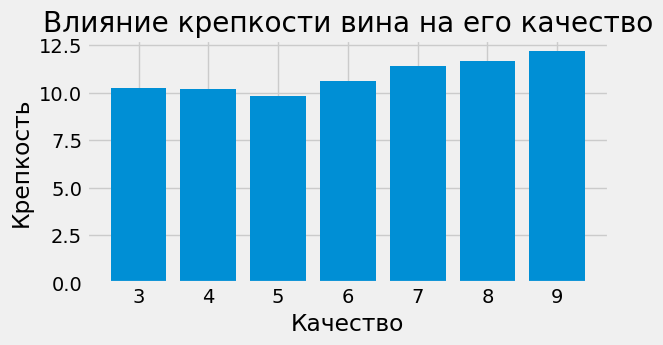

Выводы! Крепкость качественного вина незначительно увеличивается с повышением качества.


In [209]:
# Создаю линейный график зависимости качества вина и его крепкости
plt.figure(figsize = (6,3))
plt.bar(data['quality'], data['mean']) # Х=data['quality'] У=data['count']
plt.title('Влияние крепкости вина на его качество')
plt.xlabel('Качество')
plt.ylabel('Крепкость')
plt.show()
print('\033[93m' + 'Выводы! Крепкость качественного вина незначительно увеличивается с повышением качества.')

In [210]:
# Готовлю данные для графика зависимости качества вина от общего диоксида серы
wine1 = wine_quality['total sulfur dioxide'].loc[wine_quality['good'] == 1]
wine2 = wine_quality['total sulfur dioxide'].loc[wine_quality['good'] == 0]
wine1.head()

3      60.0
7      21.0
8      18.0
16    103.0
19     56.0
Name: total sulfur dioxide, dtype: float64

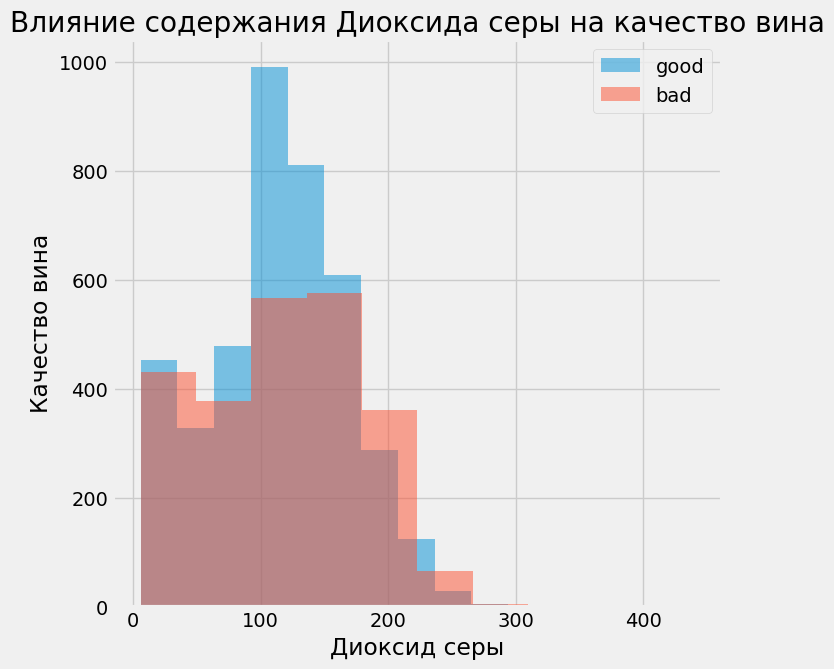

Выводы! Количество Диоксида серы в начественном и некачественном вине примерно одинаковое,
но частота его использования в качественном вине в два раза выше


In [211]:
# Создаю график влияния содержания Диоксида серы на качество вина
plt.figure(figsize = (7,7))
plt.hist(wine_quality['total sulfur dioxide'].loc[wine_quality['good'] == 1], alpha = 0.5, label = 'good')
plt.hist(wine_quality['total sulfur dioxide'].loc[wine_quality['good'] == 0], alpha = 0.5, label = 'bad')
plt.title('Влияние содержания Диоксида серы на качество вина')
plt.xlabel('Диоксид серы')
plt.ylabel('Качество вина')
plt.legend()
plt.show()
print('\033[93m' + 'Выводы! Количество Диоксида серы в начественном и некачественном вине примерно одинаковое,\nно частота его использования в качественном вине в два раза выше')

In [212]:
# Готовлю данные для графика зависимоти крепкости вина от его типа
wine1 = wine_quality['alcohol'].loc[wine_quality['type wine'] == 'red']
wine2 = wine_quality['alcohol'].loc[wine_quality['type wine'] == 'white']
wine1.head()

0    9.4
1    9.8
2    9.8
3    9.8
4    9.4
Name: alcohol, dtype: float64

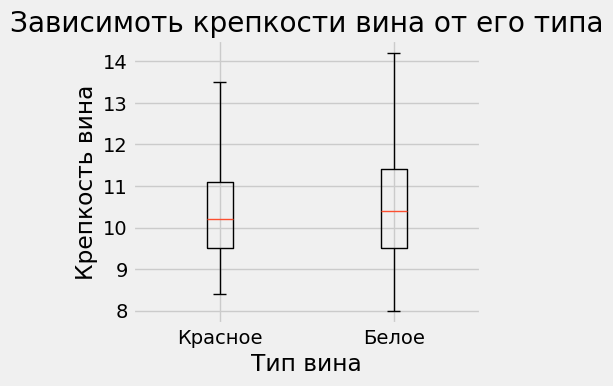

Выводы! Диапазон крепкости красного вина ниже, чем у белого вина.
Хотя средняя крепкость красного и белого вина практически одинакова.


In [213]:
# Создаю график зависимоти крепкости вина от его типа
plt.figure(figsize = (4,3.5))
plt.boxplot([wine1, wine2], showfliers = False)
plt.title('Зависимоть крепкости вина от его типа')
plt.xlabel('Тип вина')
plt.ylabel('Крепкость вина')
plt.xticks([1, 2], ['Красное', 'Белое'])
plt.show()
print('\033[93m' + 'Выводы! Диапазон крепкости красного вина ниже, чем у белого вина.\nХотя средняя крепкость красного и белого вина практически одинакова.')

In [214]:
# Подготовка данных для графика разброса хлоридов
wine3 = wine_quality.groupby('chlorides')['good'].sum().reset_index()
wine3.head()

,chlorides,good
0,0.009,0
1,0.012,3
2,0.013,0
3,0.014,3
4,0.015,4


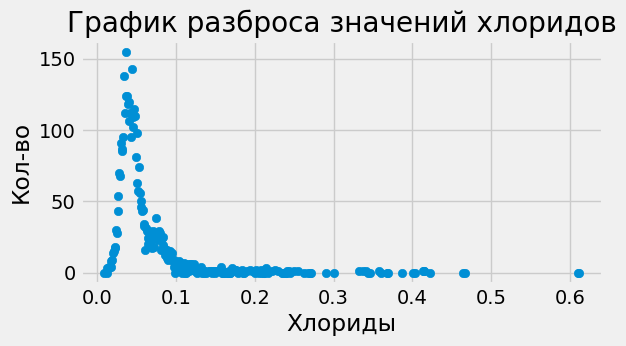

Выводы! В хорошем вине показатель кол-ва хлоридов должен составлять не более 0,1.


In [215]:
# Создаю график зависимоти крепкости вина от его типа
plt.figure(figsize = (6,3))
plt.scatter(wine3['chlorides'], wine3['good'])
plt.title('График разброса значений хлоридов')
plt.xlabel('Хлориды')
plt.ylabel('Кол-во')
plt.show()
print('\033[93m' + 'Выводы! В хорошем вине показатель кол-ва хлоридов должен составлять не более 0,1.')

In [216]:
# Строю корреляционную матрицу
correlation = wine_quality.corr(numeric_only=True)
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.067354
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.267046
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.075739
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.032484
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.181908
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.044819
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.047585
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.268876
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.018842
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.035807


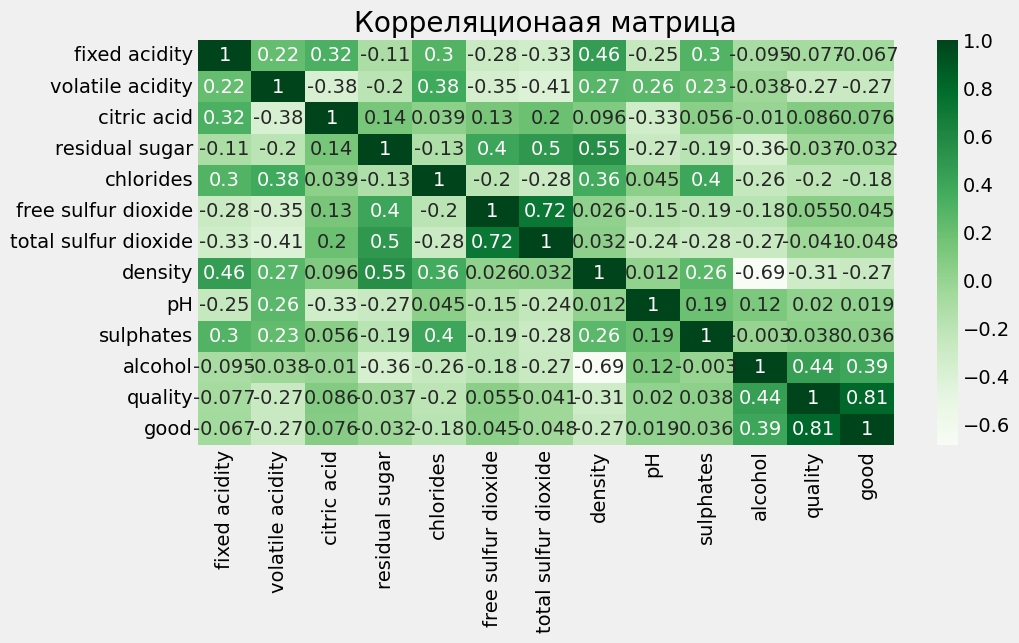

In [217]:
# Строю хитмэп по матрице корреляций
plt.figure(figsize = (10,5))
sns.heatmap(correlation, cmap = 'Greens', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

4. Отчет сделать в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.
Формат - ссылка на ноутбук Colab.

In [218]:
print('\033[93m' + 'Выше были рассмотрены наборы данных, которые относятся к белым и красным вариантам португальского вина "Винью Верде".\nНаборы данных описывают количество различных химических веществ, присутствующих в вине, и их влияние на его качество.')

Выше были рассмотрены наборы данных, которые относятся к белым и красным вариантам португальского вина "Винью Верде".
Наборы данных описывают количество различных химических веществ, присутствующих в вине, и их влияние на его качество.
